# Quickstart

If you have an already installed Python3 environment in your operating system, the easiest way to install `Deep-LC` is to using pip:

```
pip install deep-lc -U
```
The detailed information can be found in our installation instructions.

Once you have successfully installed the `Deep-LC` package, you can download our released model for your light curve classification. 

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import deep_lc as dl

### 1. Load model

We have different models for various situations. In most cases, you can choose our "combined_17_conformal" model as the default model, since it contains most classes and has been well calibrated for in-distribution data.

If you are only interested in variable stars from space-based observations, like TESS, Kepler, you can choose our "combined_7_conformal" model as the default model, since it only trained on Kepler/TESS dataset for variable stars and also has been well calibrated for in-distribution data.

If you are focusing on the anomaly detection, based on our test, only the power spectrum model should be applied

In [3]:
dl_combined = dl.DeepLC(
    combined_model="combined_17_conformal.ckpt",
    conformal_calibration=True,
    device="cpu",
)

/home/ckm/miniconda3/envs/torch20/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


### 2. Load light curve

The allowed single band light curve data format should be a numpy array with shape (N, 2), where N is the number of data points in the light curve. The first column is the time and the second column is the relative variability. The time should be in unit of days and the variability normally avarage at 0. The time should be sorted in ascending order.

For a multiband light curve, the data format should be a numpy array with shape (N, 3) or (N, 4). where N is the number of data points in the light curve. If shape is (N, 3), the first column is the time, the second column is the relative variability and the third column is the band index (start from 1). If the shape is (N, 4), the third column is the uncertainties of variability and the forth column is the band index. The time should be in unit of days. The time should be sorted in ascending order.

In most cases, you can use the `light_curve_preparation` function to prepare your light curve data. The function will return a numpy array with shape (N, 2) or (N, 3) or (N, 4) depending on the input data. It can handle single or multiband light curves automatically.

In [4]:
import lightkurve as lk
import lightkurve_ext as lkx  # This is my extention of lightkurve for some extra functionality

/home/ckm/miniconda3/envs/torch20/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/ckm/.lightkurve/cache. Please move all the files in the legacy directory /home/ckm/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [5]:
# download a TESS light curve
lc_data_list = lk.search_lightcurve(
    "TIC 470109695", mission="TESS", exptime="short", author="SPOC"
).download_all()
lc_data = lkx.LightCurveCollection(
    lc_data_list
).stitch()  # Use my own stitching function to stitch the light curves together
lc = dl.light_curve_preparation(time=lc_data.time.value, flux=lc_data.flux)

### 3. Predict

(['Rot/CEB'],
 (<Figure size 540x810 with 7 Axes>, <Figure size 540x450 with 4 Axes>))

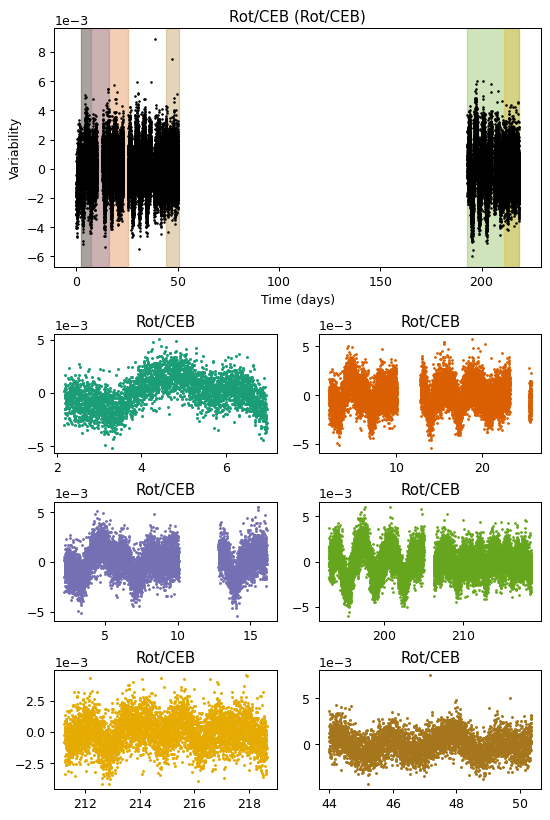

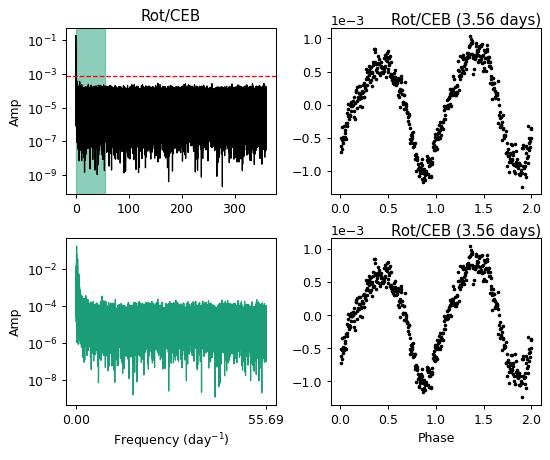

In [6]:
dl_combined.predict(
    lc, show_intermediate_results=True, return_conformal_predictive_sets=True
)

### 4. ZTF light curve example:

In [7]:
# load a ZTF light curve
data = np.load(
    "ZTF20aawwcgb.npy",
    allow_pickle=True,
)

(['SN Ia'],
 (<Figure size 540x630 with 5 Axes>, <Figure size 540x720 with 8 Axes>))

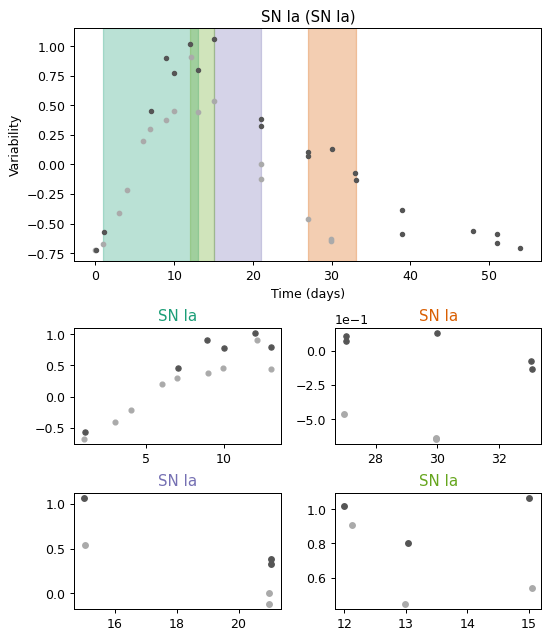

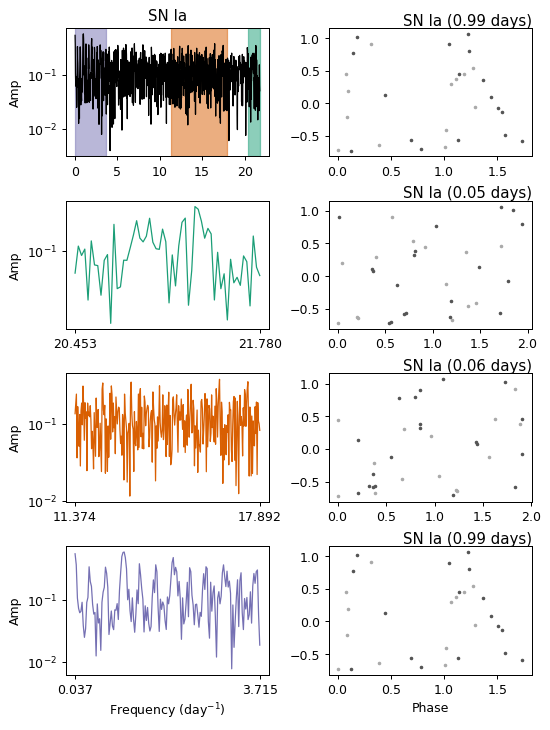

In [8]:
dl_combined.predict(
    data,
    show_intermediate_results=True,
    return_conformal_predictive_sets=True,
)

One can also enable the FAP for multiband Lomb-Scargle, would return less frequency candiates but takes more time.

(['SN Ia'],
 (<Figure size 540x630 with 5 Axes>, <Figure size 540x450 with 4 Axes>))

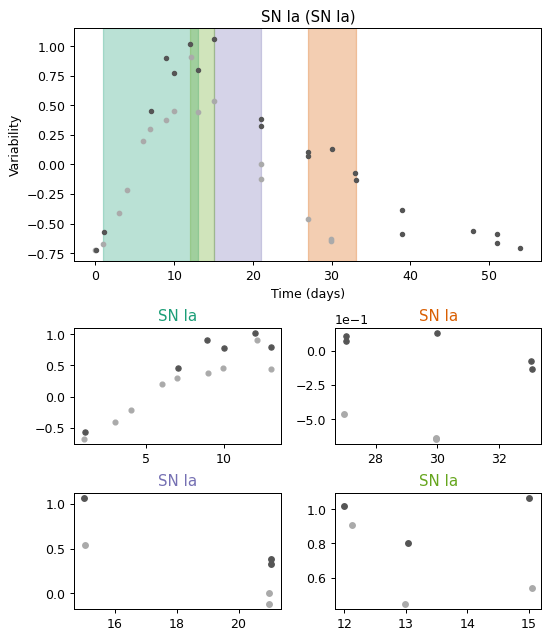

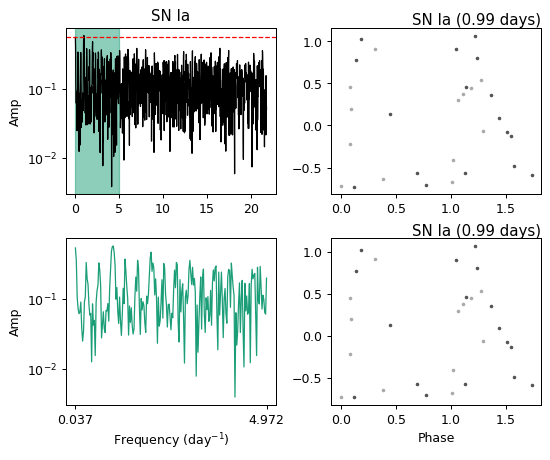

In [9]:
dl_combined.predict(
    data,
    multiband_FAP=True,
    show_intermediate_results=True,
    return_conformal_predictive_sets=True,
)